In [0]:
# Importing Pandas and Numpy
import pandas as pd
import numpy as np

In [0]:
# Importing Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
#Installing Geopandas
pip install geopandas

In [0]:
### Importing Geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

In [187]:
# Loading dataset
from google.colab import files
uploaded = files.upload()

Saving coronavirus_data.csv to coronavirus_data (1).csv


In [0]:
df = pd.read_csv("coronavirus_data.csv")

In [185]:
#Displaying the first 5 rows
df.head()

,Index,Province/State\n,Country/Region\n,Lat\n,Long\n\n\n\n\n,Date\n\n\n\n\n,Confirmed\n,Deaths\n\n,Recovered\n\n\n\n\n
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [110]:
# Getting the column names
df.columns

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [111]:
# Removing unwanted symbols from column names
df.columns.str.replace(r'\n','', regex=True)

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [0]:
# Updating our columns
df.columns = df.columns.str.replace(r'\n','', regex=True)

In [113]:
# Displaying our updated columns
df.columns

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [0]:
# Renaming the required columns
df.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region'},inplace=True)

In [115]:
# Displaying our columns
df.columns

Index(['Index', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [116]:
# Checking the number of rows and columns in our dataset
df.shape

(3885, 9)

In [117]:
# Displaying the data type of our columns
df.dtypes

Index               int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [118]:
# Displaying first 10 rows of our newly updated dataset
df.head(10)

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0
5,6,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0
6,7,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0
7,8,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0
8,9,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0
9,10,Hebei,Mainland China,38.0428,114.5149,1/22/20,1,0,0


In [120]:
# Checking the number of missing values
df.isna().sum()

Province_State    1665
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [121]:
# Getting statistics of our data
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,32.252000,45.775760,396.487773,10.804118,78.544402
std,18.256877,84.338854,4017.397180,137.191519,846.918788
min,-37.813600,-123.869500,0.000000,0.000000,0.000000
25%,27.610400,8.227500,0.000000,0.000000,0.000000
50%,35.191700,78.000000,2.000000,0.000000,0.000000
75%,42.315400,113.614000,40.000000,0.000000,4.000000
max,64.000000,153.400000,65596.000000,2641.000000,23383.000000


In [122]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [123]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [124]:
# Groping our data on basis of date
df.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Date,,,
1/22/20,555,17,28
1/23/20,653,18,30
1/24/20,941,26,36
1/25/20,1434,42,39
1/26/20,2118,56,52
1/27/20,2927,82,61
1/28/20,5578,131,107
1/29/20,6166,133,126
1/30/20,8234,171,143


In [0]:
df_per_day = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()

In [126]:
# Calculating max
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [127]:
df_per_day.describe()

,Confirmed,Deaths,Recovered
count,37.000000,37.000000,37.000000
mean,32616.756757,1082.513514,5338.540541
std,25664.132012,915.678972,6895.411802
min,444.000000,17.000000,28.000000
25%,5806.000000,204.000000,141.000000
50%,29631.000000,871.000000,1795.000000
75%,61682.000000,1921.000000,9128.000000
max,65596.000000,2641.000000,23383.000000


In [128]:
# Getting max no of cases per day
df_per_day['Confirmed'].max()

65596

In [129]:
# Getting minimum number of cases per day
df_per_day['Confirmed'].min()

444

In [130]:
# Date on which maximum number was discovered
df_per_day['Confirmed'].idxmax()

'2/27/20'

In [131]:
# Date on which minimum number was discovered
df_per_day['Confirmed'].idxmin()

'1/22/20'

In [132]:
# Getting number of cases per country 
df.groupby(['Country_Region'])['Confirmed','Deaths', 'Recovered'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,1,0,0
Algeria,1,0,0
Australia,8,0,4
Austria,3,0,0
Bahrain,33,0,0
Belgium,1,0,1
Brazil,1,0,0
Cambodia,1,0,1
Canada,7,0,3


In [134]:
# Value count of each country
df['Country_Region'].value_counts()

Mainland China          1147
US                       629
Australia                185
Canada                   111
Algeria                   37
France                    37
Netherlands               37
Switzerland               37
Sri Lanka                 37
Thailand                  37
Estonia                   37
Greece                    37
Philippines               37
Others                    37
Sweden                    37
Croatia                   37
UK                        37
Denmark                   37
Taiwan                    37
Kuwait                    37
Iraq                      37
Georgia                   37
Macau                     37
South Korea               37
Oman                      37
Lebanon                   37
Brazil                    37
Belgium                   37
Germany                   37
Japan                     37
Vietnam                   37
San Marino                37
Austria                   37
India                     37
Malaysia      

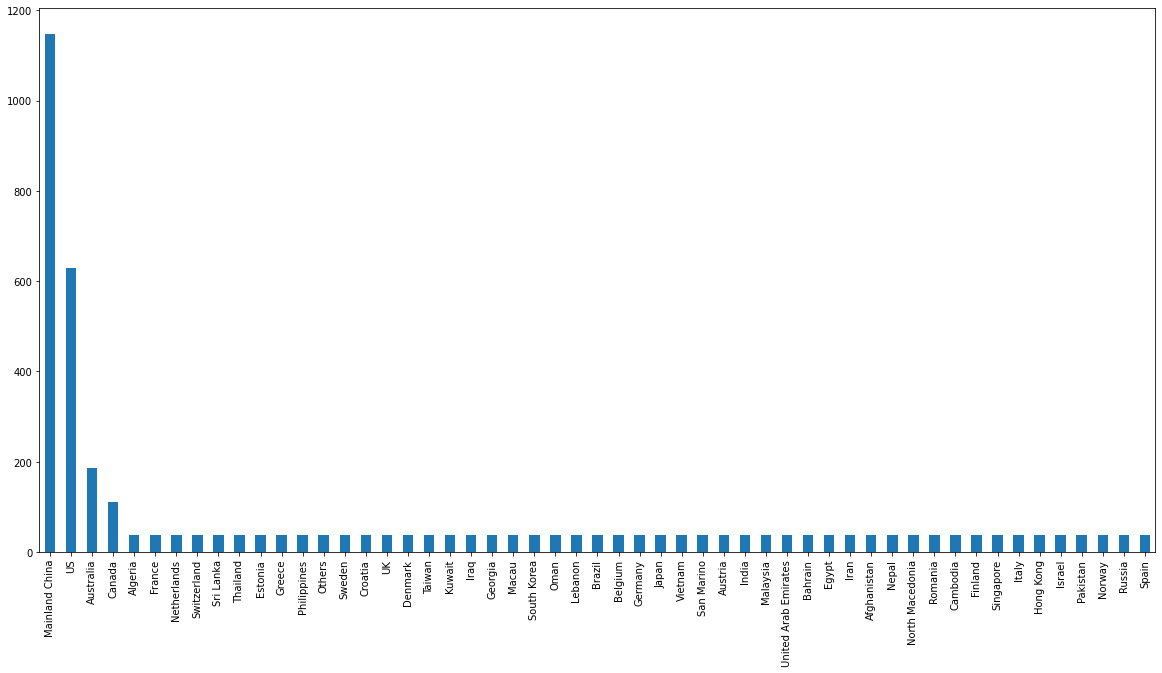

In [135]:
#Plotting a bar graph based on number of cases per country
df['Country_Region'].value_counts().plot(kind='bar',figsize=(20,10))

In [136]:
# Name of the countries Coronavirus has affected till now
df['Country_Region'].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino'], dtype=object)

In [137]:
# Number of countries Coronavirus has affected till now
len(df['Country_Region'].unique())

53

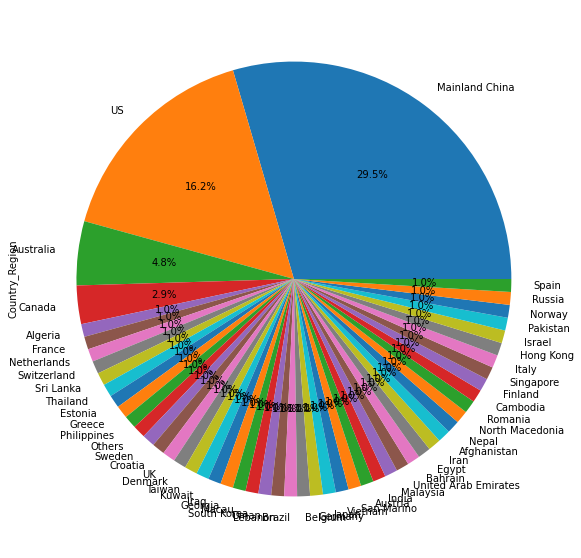

In [138]:
# Pie Chart of 53 affected countries and percentage of cases per country
plt.figure(figsize=(20,10))
df['Country_Region'].value_counts().plot.pie(autopct="%1.1f%%")

In [139]:
#Using Geopandas
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [140]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [0]:
# Converting our data to GeoDataframe
gdf01 = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Long'],df['Lat']))

In [142]:
# Displaying our newly converted data
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [143]:
# Checking type of our data
type(gdf01)

geopandas.geodataframe.GeoDataFrame

In [0]:
# Method 2
points = [ Point(x,y) for x,y in zip(df.Long,df.Lat)]

In [0]:
gdf03 = gpd.GeoDataFrame(df,geometry=points)

In [146]:
gdf03

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3880,NaN,Romania,45.9432,24.9668,2/27/20,1,0,0,POINT (24.96680 45.94320)
3881,NaN,Denmark,56.2639,9.5018,2/27/20,1,0,0,POINT (9.50180 56.26390)
3882,NaN,Estonia,58.5953,25.0136,2/27/20,1,0,0,POINT (25.01360 58.59530)
3883,NaN,Netherlands,52.1326,5.2913,2/27/20,1,0,0,POINT (5.29130 52.13260)


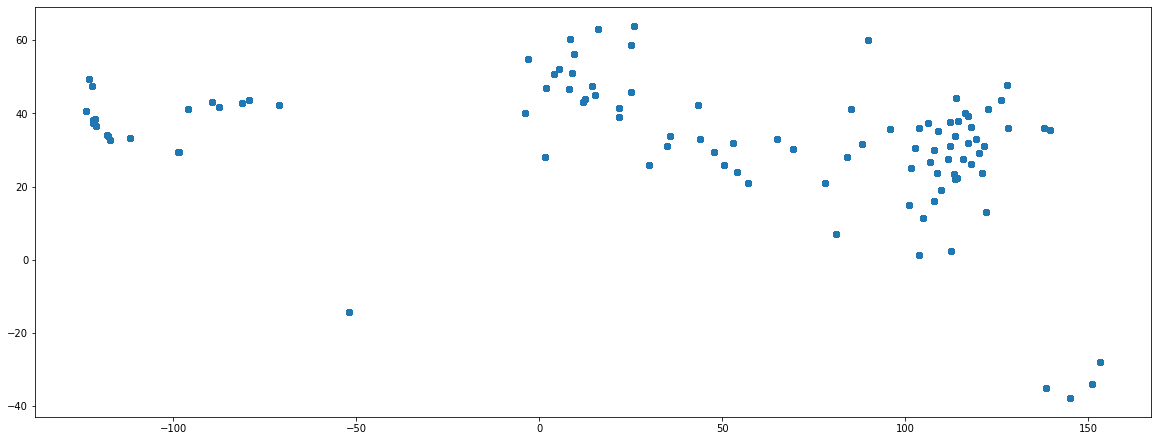

In [147]:
# Plotting our data
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

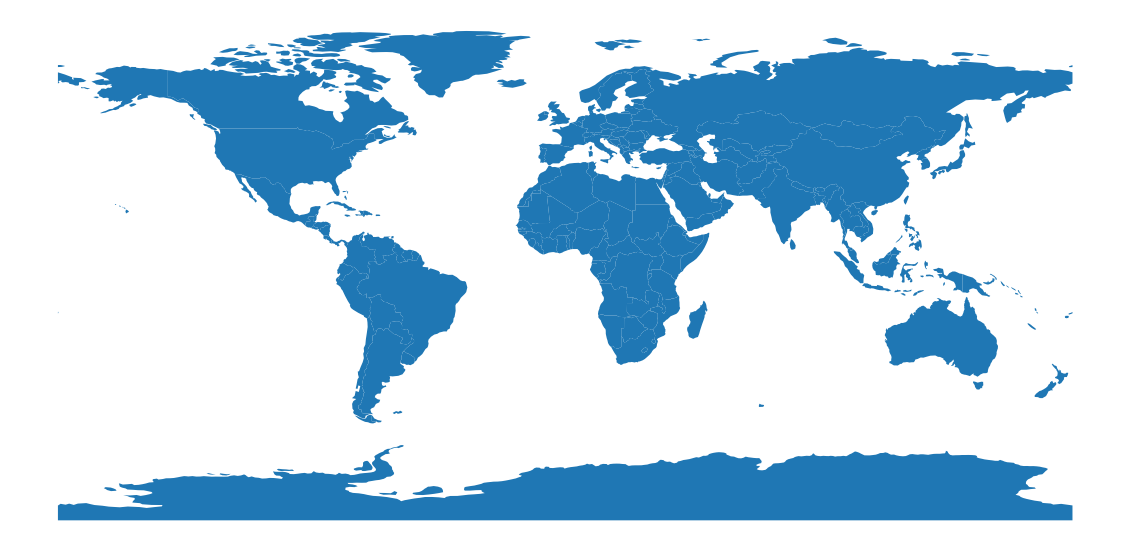

In [148]:
# Displaying the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

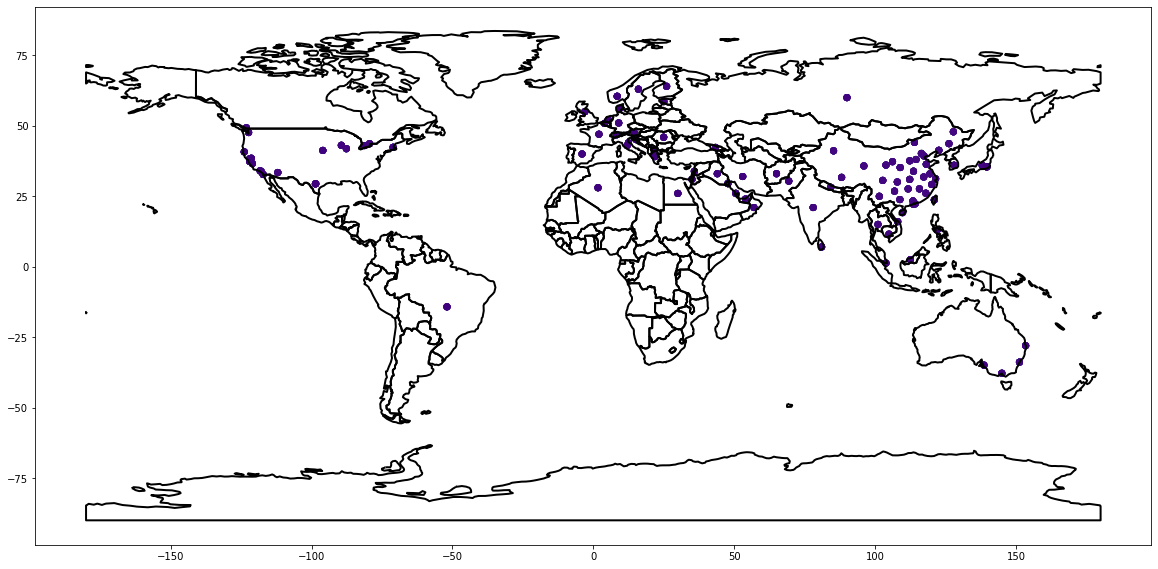

In [149]:
# Merging our data and the world map
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

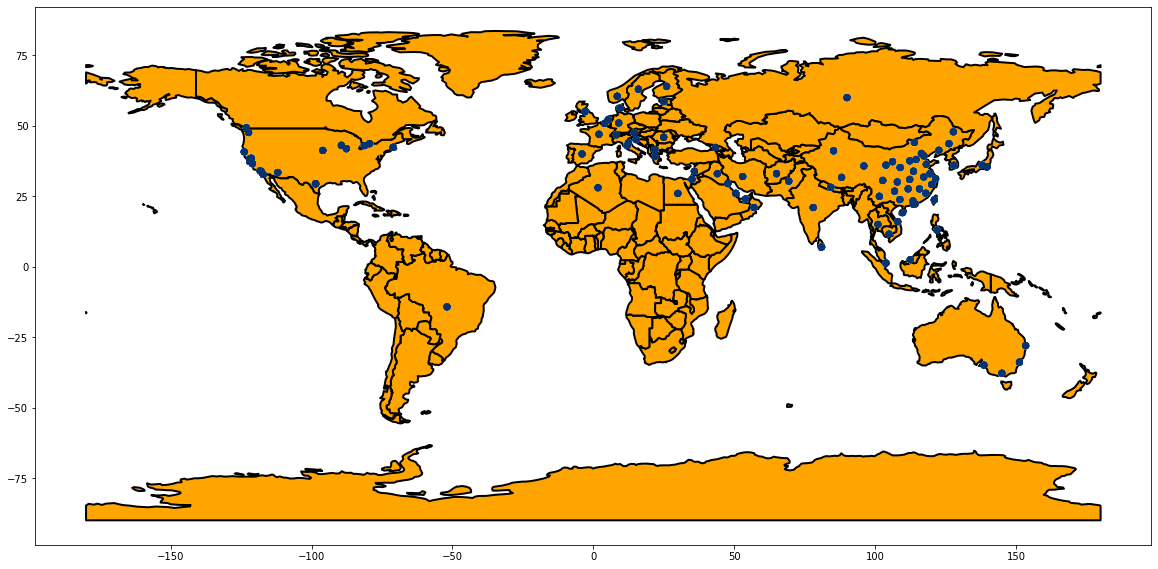

In [200]:
# Changing colour of our map and data points
fig,ax = plt.subplots(figsize=(20,10))
world.geometry.plot(color='Orange',edgecolor='k',linewidth=2,ax=ax)
gdf01.plot(cmap='Blues',ax=ax)

In [151]:
# Per  country
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [152]:
# Getting number of continents
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [0]:
# Selecting data only for Asia
asia = world[world['continent'] == 'Asia']

In [154]:
asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [0]:
# In a same manner, storing data  for a specific continent in a specific variable
africa = world[world['continent'] == 'Africa']
north_america = world[world['continent'] == 'North America']
europe = world[world['continent'] == 'Europe']

In [156]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [157]:
# Getting number of cases in Mainland China
df[df['Country_Region'] == 'Mainland China']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3806,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


In [158]:
# Getting number of cases in China using Geopandas
gdf01[gdf01['Country_Region'] == 'Mainland China']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3806,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


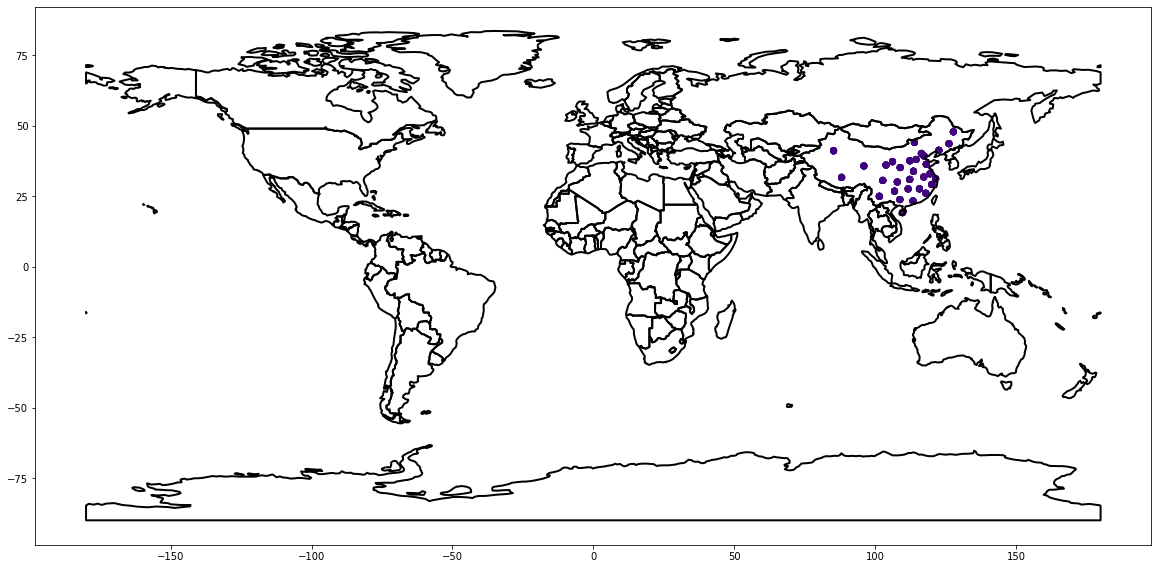

In [159]:
# Only displaying the cases only in China
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

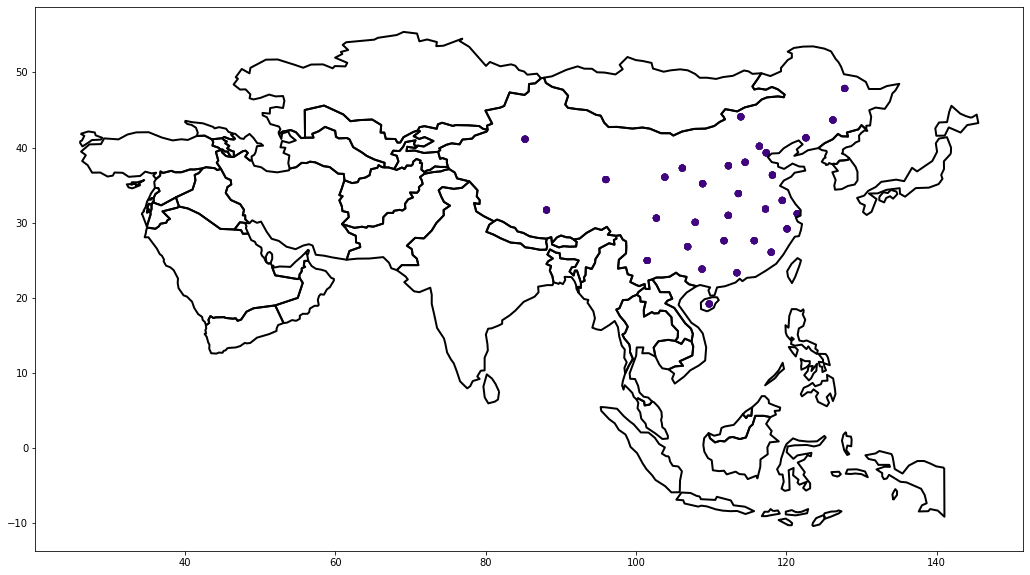

In [160]:
# Displaying the cases in China using map of Asia
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

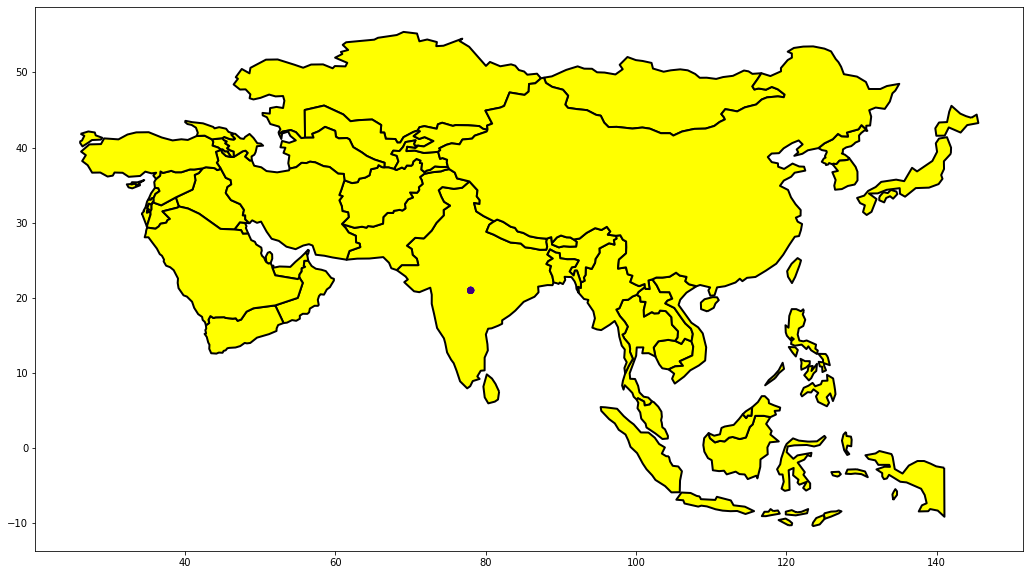

In [218]:
# Displaying the cases in India using map of Asia
fig,ax = plt.subplots(figsize=(20,10))
asia.geometry.plot(color='Yellow',edgecolor='k',linewidth=2,ax=ax)
gdf01[gdf01['Country_Region'] == 'India'].plot(cmap='Purples',ax=ax)

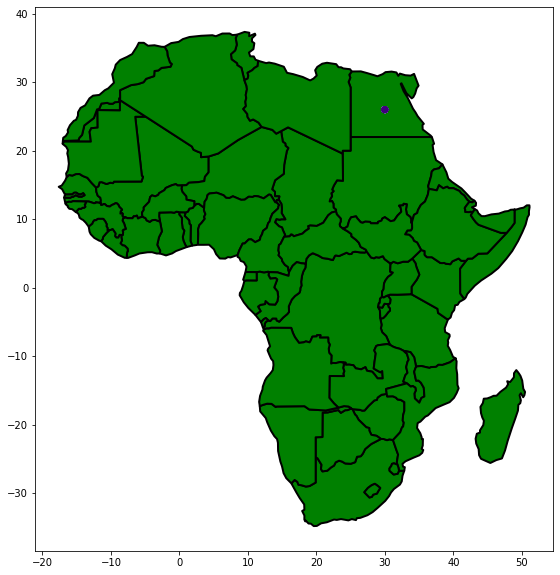

In [219]:
# Displaying the cases in Egypt using map of Africa
fig,ax = plt.subplots(figsize=(20,10))
africa.geometry.plot(color='Green',edgecolor='k',linewidth=2,ax=ax)
gdf01[gdf01['Country_Region'] == 'Egypt'].plot(cmap='Purples',ax=ax)

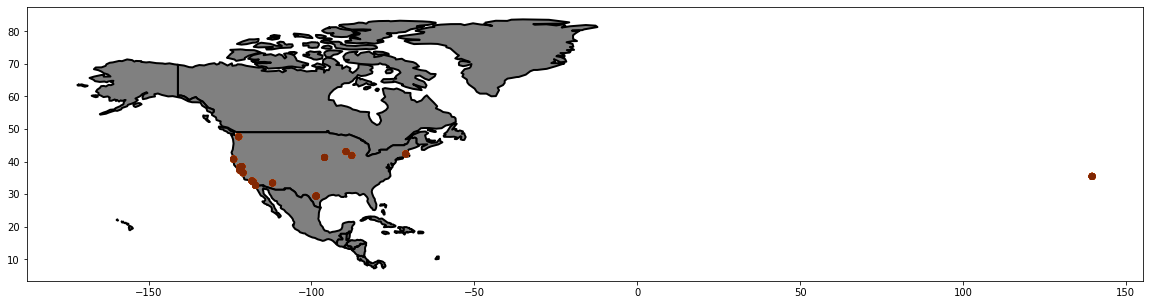

In [217]:
# Displaying the cases in United States using map of North America
fig,ax = plt.subplots(figsize=(20,10))
north_america.geometry.plot(color='Grey',edgecolor='k',linewidth=2,ax=ax)
gdf01[gdf01['Country_Region'] == 'US'].plot(cmap='Oranges',ax=ax)

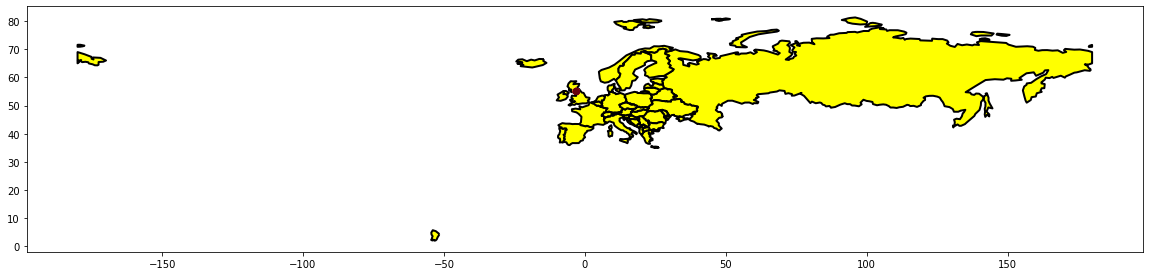

In [204]:
# Displaying the cases in United Kingdom using map of Europe
fig,ax = plt.subplots(figsize=(20,10))
europe.geometry.plot(color='Yellow',edgecolor='k',linewidth=2,ax=ax)
gdf01[gdf01['Country_Region'] == 'UK'].plot(cmap='Reds',ax=ax)

In [0]:
df.to_csv("coronavirus_cleaned_data.csv")